# 4. Birth Rate Simulation

In problem 3 of this problem set, you derived a likelihood function and posterior density for the male birth rate $\rho$, where $\rho$ represents the probability that a newborn is male.   Of course, $\rho$ is not known and needs to be estimated from observations of male and female births.  In problem 3, you derived the form of the posterior.  In this problem, you will build on your solution to problem 3 by computing the posterior density and making various conclusions about the uncertainty in our knowledge of $\rho$.  


The cells below define functions for generating synthetic "birth" data, evaluating the log of the likelihood function (i.e., $\log f(b | \rho)$), and computing the log of the prior density $\log f(\rho)$.   The remaining code cells will use these functions to evaluate and plot the posterior density. The log-likelihood and log-prior functions are not implemented, so the first task in this part is to fill in these functions with the likelihood and prior you derived in question 3 of this problem set.  

**The locations where you need to add code are labeled with a comment containing "TODO".**    

Computing factorials with large numbers can quickly lead to [numerical overflow](https://en.wikipedia.org/wiki/Integer_overflow).   Instead of using factorials directly to compute the mass function of the binomial distribution, I highly recommend using the
[Scipy Binomial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) class.   This is already imported into this notebook for you.


#### Tasks:
1. Read the "Creating Your First Notebook" section of [this tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) on Jupyter notebooks.
1. Fill in the log-likelihood and log-prior functions and run all the cells in this notebook.  Remember that they should return the $\log$ of the densities.
1. Change the amount of data used to construct your likelihood function by changing the `total_births` variable.  Recompute the posterior for various amounts of data.  How does the posterior density change?   Write down your observations in a new markdown cell at the end of this Jupyter notebook.  Try starting with just a observations, i.e., `total_births=1`,`total_births=2`, etc...  and ten try with a large number of observations (e.g., `total_births=100000`).
1. Using $1000$ observations, estimate the probability that there are more male births than female births, i.e., $\mathbb{P}(\rho\geq0.5)$.   Suggestions on how you might compute this quantity are provided below.

#### Getting help
- If you are unfamiliar with python, it may be helpful to look through the first few sections of the [Plotting and Programming with Python](https://swcarpentry.github.io/python-novice-gapminder/) material from Software Carpentry.
- If you are still stuck, create a post on the Discussion page describing the issue you are having.  Feel free to include code snippets or error messages in your post.  This will help me (or your fellow classmates) help diagnose the issue.

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

## Tasks 1 and 2:
The following cells contain the template code you should use to complete tasks 1 and 2.  Most of the code does not need to be changed.   Changes are only required where you see a "TODO" comment.  If a cell does not contain a "TODO", then you will be able to run it without changing or adding anything.

In [2]:
def GenerateData(total_births):
    """ This function simulates birth gender data by returning an array containing 1's or
        0's.  1's indicate a male birth and 0's indicate a female birth.
        
        ARGS:
            total_births (int): The total number of births to simulate.
        
        RETURNS:
            int: The number of male births
            int: The number of female births
    """
    u = np.random.rand(total_births)
    male = np.sum(u<0.51)
    female = total_births - male
    return male, female
    

In [3]:
def LogLikelihood(rho, male_births, female_births):
    """ TODO (task 2): Fill in this function with the likelihood you developed in 
              problem 3 of this problem set. 
              
        ARGS:
            rho (np.array): An array of possible rho values
            male_births (int): A scalar containing the number of observed male births
            female_births (int): A scalar containing the number of observed female births
        
        RETURNS:
            np.array: An array the same shape as the input rho containing the log-likelihood
                      function evaluated at each rho.
    """
    num_births = male_births + female_births
    
    # TODO (task 2): REPLACE THE "log_likelies" ARRAY WITH YOUR LIKELIHOOD FROM PROBLEM 3.
    log_likelies = np.log( binom.pmf(male_births, num_births, rho) )
    
    return log_likelies

In [4]:
def LogPrior(rho):
    """ TODO (task 2): Fill in this function with the prior you used in problem 3 of this problem set.
    
        ARGS:
            rho (np.array): An array of possible rho values
        
        RETURNS:
            np.array: An array the same shape as rho containing the log-prior evaluated for each component of rho.
    """
    
    # TODO (task 2): REPLACE THE "logprior" ARRAY WITH YOUR PRIOR FROM PROBLEM 3.
    # NOTE: Nothing actually needs to be done here because f(\rho)=U[0,1]
    log_prior = np.zeros(rho.shape)
    
    return log_prior

#### Generate synthetic "observations" of male and female births

In [5]:
# TODO (task 3):  Try changing this variable and studying it's impact on the posterior:
total_births = 1000

male_obs, female_obs = GenerateData(total_births)

#### Compute the unnormalized log-posterior density on $\rho$
NOTE: You might see a warning saying "divide by zero encountered in log."  This is fine.  It just means that we tried to take the $\log$ of $0$ and that numpy will return $-\infty$.  Later we exponentiate the log_posterior, which converts the $-\infty$ to $0$ as expected.

In [6]:
rho = np.linspace(0,1,300)

log_likelihood = LogLikelihood(rho, male_obs, female_obs)
log_prior = LogPrior(rho)
log_posterior = log_likelihood + log_prior

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


#### Plot the unnormalized posterior density

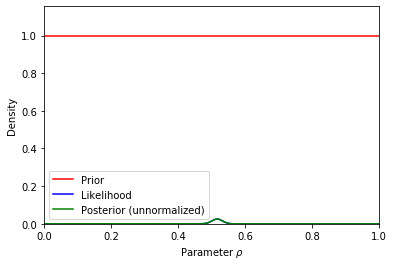

In [7]:
plt.plot(rho, np.exp(log_prior), 'r', label='Prior')
plt.plot(rho, np.exp(log_likelihood), 'b', label='Likelihood')
plt.plot(rho, np.exp(log_posterior), 'g', label='Posterior (unnormalized)')

# Add labels to the x and y axes. Note that matplotlib allows LaTeX to be used
# in the labels, but some "special" characters like '\r' or '\n' need to be
# "escaped" with an extra backslash, hence '\\r'.
plt.xlabel('Parameter $\\rho$')
plt.ylabel('Density')

# Reset the limits on the y axis to start at 0 and add a little more space on the top
ymin, ymax = plt.ylim()
plt.ylim([0,1.1*ymax])

# Reset the limits on the x axis to span the sample space [0,1]
plt.xlim([0,1])

# Show the legend
plt.legend()
plt.show()

#### Estimate the evidence and compute the normalized posterior density
Let $d$ denote the observed male and female births.  Bayes' rule gives expresses the posterior density $f(\rho | d)$ as 

$$
f(\rho | d) = \frac{f(d | \rho) f(\rho)}{f(d)},
$$

where 

$$
f(d) = \int_0^1 f(d | \rho) f(\rho) d\rho
$$

is called the "evidence."  The evidence is constant in $\rho$ and normalizes $f(d | \rho) f(\rho)$ to ensure the posterior $f(\rho |d)$ is a valid probability density function that integrates to $1$.  Sometimes we refer to the numerator $f(d | \rho) f(\rho)$ as the "unnormalized posterior."

The following cell approximates the evidence by using the [left endpoint rule](http://www.math.wsu.edu/faculty/genz/140/lessons/l507.pdf) to approximate the integral:

$$
\int_0^1 f(d | \rho) f(\rho) d\rho \approx \Delta\rho \sum_{i=0}^{N-1} f(d | \rho_i) f(\rho_i)
$$


In [8]:
unnormalized_posterior = np.exp(log_posterior)
evidence = (rho[1]-rho[0])*np.sum(unnormalized_posterior[0:-1])

posterior = unnormalized_posterior / evidence

#### Plot the normalized posterior density

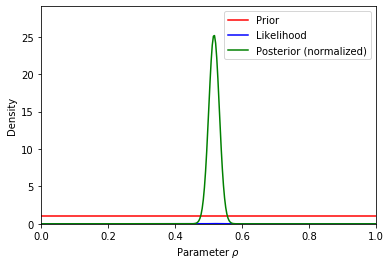

In [9]:
plt.plot(rho, np.exp(log_prior), 'r', label='Prior')
plt.plot(rho, np.exp(log_likelihood), 'b', label='Likelihood')
plt.plot(rho, posterior, 'g', label='Posterior (normalized)')

# Add labels to the x and y axes.
plt.xlabel('Parameter $\\rho$')
plt.ylabel('Density')

# Reset the limits on the y axis to start at 0 and add a little more space on the top
ymin, ymax = plt.ylim()
plt.ylim([0,1.1*ymax])

# Reset the limits on the x axis to span the sample space [0,1]
plt.xlim([0,1])

# Show the legend
plt.legend()
plt.show()

## Task 3 Results
Use this cell to describe your observations about the posterior. 

#### Solution:
As the number of observations increases, the posterior variance shrinks and becomes centered on the true value of 0.51.  With more observations, the posterior density also begins to resemble a Normal density.

## Task 4:
To compute the evidence above, we numerically approximated an integral using the left endpoint rule.   This is not the most accurate approximation (it has error $O(1/N)$), but is simple to implement.   Use the left endpoint rule (or another more accurate numerical integration strategy) to approximate the the probability $\mathbb{P}(\rho \geq 0.5)$ using $1000$ observations.  

#### Solution:
Let $f$ and $m$ denote the number of female and male births, respectively.  We are interested in computing the integral
$$
\mathbb{P}(\rho\geq 0.5) = \int_{0.5}^{1.0} f(\rho | f,m) d\rho
$$

In [10]:
rho2 = np.linspace(0.5,1.0,100)

log_likelihood2 = LogLikelihood(rho2, male_obs, female_obs)
log_prior2 = LogPrior(rho2)
log_posterior2 = log_likelihood2 + log_prior2
posterior2 = np.exp(log_posterior2) / evidence # notice that the evidence is the same as above

prob = (rho2[1]-rho2[0])*np.sum(posterior2)

print('P(\rho>0.5) = ', prob)

ho>0.5) =  0.8924685963367933


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
